<a href="https://colab.research.google.com/github/gary464/COLAB-For-Kinematics/blob/main/Modelling_Projectiles_Teacher_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This COLAB Notebook Demonstrates how we can create a model to simulate a mathematical funcation - In this case we are modelling Projectile Motion**

The notebook first utilizes the standard kinematics formulas to create a plot of a projectile (note- we re using a scatter plot so we need individual points, the plot function could also be used to pplot the basic function).

THe program then goes on to model the projectile using a simplification on how the velocity changes from on time to the next across intervals.

The key teaching purpose to this Notebook is to show that computer models can be set up to model functions and as the time interval decreases the error falls dramatically.

While we are unlikely to create a model to simulate a simple function (as in this notebook), as we start working with more complex functions or systems of functions, computer simulations can become a more practical solution to these complex situations.

**Let's Import some needed libraries AND Initialize some variables**

Note:  We will now change velocity such that we will simply have v0 (initial velocity) and an angle (measured in degrees).

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

x0 = 0
y0 = 100
v0 = 20
angle = 60
ax = 0
ay = -9.81
t = 0

**First let's Calculate the initial x and y velocities from the initial absolute velocity and the initial angle**

The basic geometry of a launched object allows us to decompose the absolute velocity into the verticle and horizontal velocities using the the following equations:

vx0 = v * cos(angle)

vy0 = v * sin(angle)

Numpy expects the angle to be in radians so we will first need to convert degrees to radians using the following:

angle_radians = angle / 360 * 2 * np.pi

In [4]:
vx0 = v0 * np.cos((angle / 360) * 2 * np.pi)
vy0 = v0 * np.sin((angle / 360) * 2 * np.pi)
print('vx0 = ',vx0)
print('vy0 = ',vy0)


vx0 =  10.000000000000002
vy0 =  17.32050807568877


**This WHILE LOOP Structure will generate our x and y location data as time progresses.**

We will use the formula for accelerated motion in both the x an y directions.

From Kinematics (in physics) the position of an obect that is accelerating at a constant rate is:

x = x0 + vx0 * t + 0.5 * ax * t ^2  (note in python we will use ** instead of ^)

For a projectile the object is travelling through the air.  First for simplicity we will assume that there is no air resistance.  This then allows us to assume that the only force acting on the projectile while in motion is gravity.  This then tells us that the acceleration in the x direction (ax) is equal to zero (since there is no air resistance) and the acceleration in the y direction is simply constant at the rate of the acceleration due to gravity on Earth's surface (9.81 m/s^2).  We set these variables in the first section.  Please note that the ay0 = -9.81.  The negative is included since acceleration is a vector and by convention, we are assuming that the downward direction is negative.

In [ ]:
# Create the arrays to store the x and y locations from our functions
saved_x = [x0]
saved_y = [y0]
saved_t = [0]

t = 1  # Here we set t = 1, the arrays saved_x etc already have the data point when t = 0

# This while will run over and over until t is greater than 10 (from 0 - 10: 11 steps).
while t <= 10:
  saved_x.append(x0 + vx0 * t + 0.5 * ax * t ** 2)
  saved_y.append(y0 + vy0 * t + 0.5 * ay * t ** 2)
  saved_t.append(t)

  t = t + 1

It is now time to plot the data to visualize the results

First, let's plot just representations of x and y vs. time. We will plot our data using a scatter plot. The coding for the scatter plot comes from the library matplot.lib.pyplot which we loaded in our initial steps.

Notice How easy it is to add titles and axis labels to plots in Python.

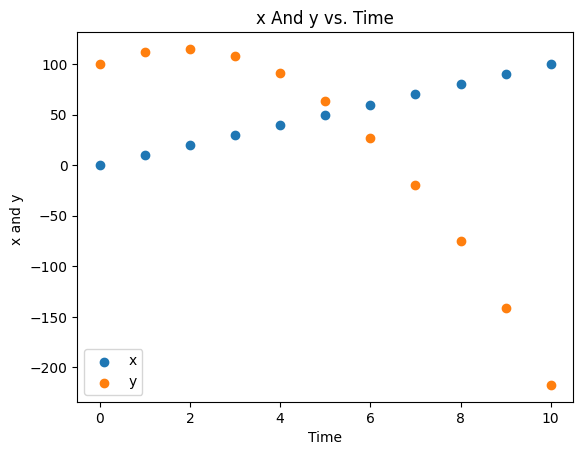

In [ ]:
scatter_plot = plt.scatter(saved_t, saved_x, label = 'x')
scatter_plot = plt.scatter(saved_t, saved_y, label = 'y')
plt.title('x And y vs. Time')
plt.xlabel('Time')
plt.ylabel('x and y ')
plt.legend()
plt.show()

**Now plot y vs x so you can visualize the motion of the object in 2 dimensions**

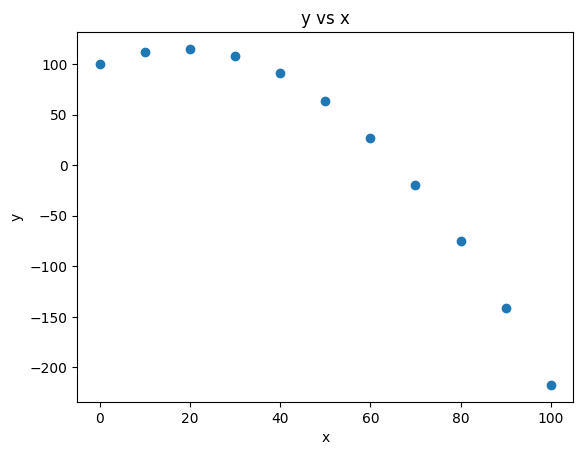

In [ ]:
scatter_plot = plt.scatter(saved_x, saved_y)
plt.title('y vs x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Now let's create a model to simulate the projectile motion and compare it to the actual derivation.**

Our simulation will simplify the math.  We will assume that at each time interval, the velocity of the object will change to a new velocity which is simply the old veoloicty + the change in velocity.  This formula looks like:

v_new = v_old + accel * dt (new velocity = old velocity + the acceleration * change in time).

We can then calculate the new x at the end of that time interval as

x_new = x_old + v_new * dt (simply the new position = old position + how far the object moved during the time interval (v_new * dt).



In [ ]:
# Create the arrays to store the x and y locations from our functions
x_sim1 = x0
y_sim1 = y0
t_sim1 = 0

# we will continue to use the same velocity and acceleration as our prior calcuation

saved_x_sim1 = [x0]
saved_y_sim1 = [y0]
saved_t_sim1 = [0]

t = 0 # Here we reset t = 0

#We create a time interval (dt) for calculating the change in location during each pass of the loop

dt = 1

#Reset all variables to initial values
x = x0
y = y0
vx = vx0
vy = vy0

t = 1  # set t = 1 since we already our data in the saved array when t = 0
#This while will run over and over until t is greater than 10 (from 0 - 10: 10 steps).
while t <= 10:

# during each time interval, the object will move at the velocity it has at the beginning of that interval.

# First we need to adjust the velocity (note we do not need t adjust vx since ax = 0)

  vy = vy + ay * dt
  x = x + vx * dt
  y = y + vy * dt

# Save our simulated values

  saved_x_sim1.append(x)
  saved_y_sim1.append(y)
  saved_t_sim1.append(t)


  t = t + dt


**Plot both the mathematical slution and the model together to compare the results**



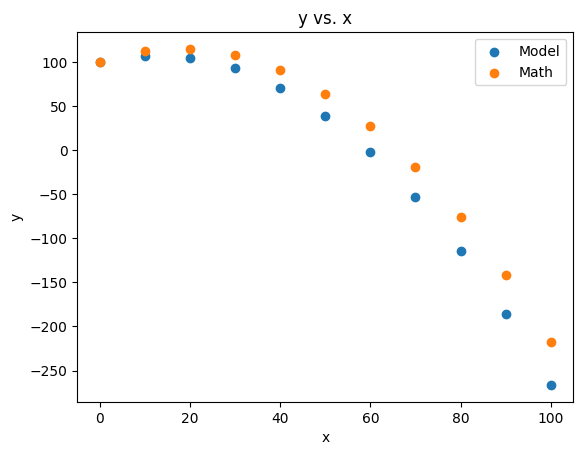

In [ ]:
scatter_plot = plt.scatter(saved_x_sim1, saved_y_sim1, label = 'Simulation')
scatter_plot = plt.scatter(saved_x, saved_y, label = "Math")
plt.title('y vs. x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**Suppose you want to show another simuation all on the same chart.**

Copy the above 2 sections.  

Change the variable from _sim1 to _sim2
Adjust the time step to see how the time step effects your fit. Set the dt = 0.5

Add a third scatter plot to your plotting.

What do you observe about the impact of decreasing the time step?

In [ ]:
# Create the arrays to store the x and y locations from our functions
x_sim2 = x0
y_sim2 = y0
t_sim2 = 0

# we will continue to use the same velocity and acceleration as our prior calcuation

saved_x_sim2 = [x0]
saved_y_sim2 = [y0]
saved_t_sim2 = [0]

t = 0 # Here we reset t = 0

#Adjust dt here

dt = .5

#Reset all variables to initial values
x = x0
y = y0
vx = vx0
vy = vy0

t = 0.5  # set t = 0.5 since we already our data in the saved array when t = 0
#This while will run over and over until t is greater than 10 (from 0 - 10: 11 steps).
while t <= 10:

# during each time interval, the object will move at the velocity it has at the beginning of that interval.

# First we need to adjust the velocity
  vy = vy + ay * dt
  x = x + vx * dt
  y = y + vy * dt

  saved_x_sim2.append(x)
  saved_y_sim2.append(y)
  saved_t_sim2.append(t)


  t = t + dt


scatter_plot = plt.scatter(saved_x_sim1, saved_y_sim1, label = 'Model dt = 1s')
scatter_plot = plt.scatter(saved_x_sim2, saved_y_sim2, label = 'Model dt = 0.5s')
scatter_plot = plt.scatter(saved_x, saved_y, label = "Math")
plt.title('y vs. x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**FINALLY:**

Go back to the previous section and change dt to 0.1s.

Run the code and see how closely the simulation matches the mathematically calculated plot.